# Аналитика интернет-магазина

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br> <br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br> <br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Содержание
<a href='#section1'> 1. Информация о данных </a> <br>
<a href='#section2'> 2. Подготовка данных </a> <br>
<a href='#section3'> 3. Исследовательский анализ данных </a> <br>
<a href='#section4'> 4. Портрет пользователя каждого региона </a> <br>
<a href='#section5'> 5. Проверка гипотез </a> <br>
<a href='#section6'> 6. Итоги </a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

<a id='section1'></a>
## Информация о данных

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. <br>
Данные за 2016 год могут быть неполными.

<a id='section2'></a>
## Подготовка данных

### Заменить названия столбцов (к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()

### Приведение типов и обработка пропусков

In [6]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Как видно, дробный тип данных для столбца critic_score излишен

In [7]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Аббревиатура tbd(to be decided) означает, что пользовательская оценка еще не определена. Заменим это значение на пропуск

In [11]:
try:
    df['critic_score'] = df['critic_score'].astype('Int64')
except:
    print('critic_score is not converted!')

try:
    df['year_of_release'] = df['year_of_release'].astype('Int64')
except:
    print('year_of_release is not converted!')

try:
    df['user_score'] = df['user_score'].astype('float')
except:
    print('user_score is not converted!')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [13]:
df[df.duplicated()].sum()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Дубликаты отсутствуют

In [14]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [15]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Строки с пропусками в названии не несут никакого смысла и не будут полезны в будущем. Удалим их

In [16]:
df = df.dropna(subset=['name'])

In [17]:
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Пропуски в critic_score, user_score, rating не могут быть заполнены, так как это могут быть новые игры, которые ещё не успели оценить. Удалить эти данные тоже нельзя, так как они могут пригодиться в дальнейшем анализе

### Расчёт суммарных продаж

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


Вывод:
- Пропуски в year_of_release заполнены 0;
- Данные в year_of_release и critic_score приведы к Int64;
- Данные user_score приведены к float;
- Удалены строки, содержащие пропуски в столбце name. Эти же строки содержали пропуски в столбце genre;
- Пропуски в столбцах в critic_score, user_score, rating не могут быть заполнены или удалены, так как это могут быть новые игры, которые ещё не успели оценить;
- Проведена проверка дубликатов.

<a id='section3'></a>
## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

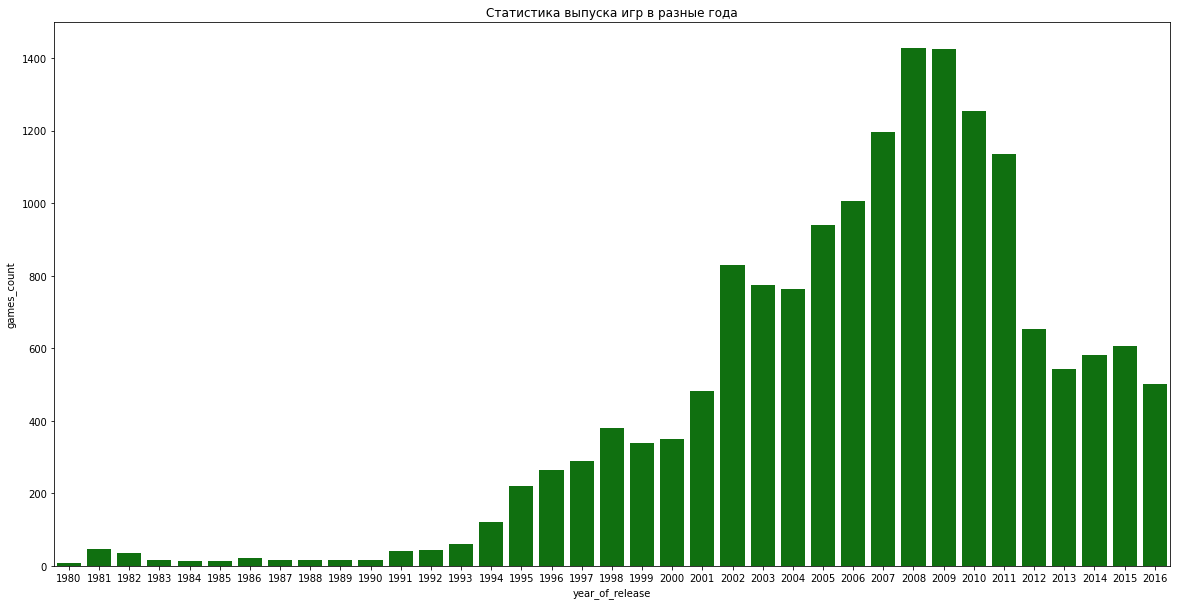

In [20]:
year_data = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_data.columns = ['games_count']
ax = sns.barplot(x=year_data.index, y=year_data['games_count'], color='green')
ax.figure.set_size_inches(20,10)
ax.set_title('Статистика выпуска игр в разные года');

В данной выборке представлены игры, выпущенные в годы с 1980 по 2016. Наибольшее количество игр из представленных было выпущено в период с 2007 по 2010. По диаграмме видно, что данные до 1995 года не имеют большой ценности, так как обладают маленьким объемом.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                    .sort_values(by='total_sales', ascending=False)
top10 = platform_sales.iloc[:10]
top10

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


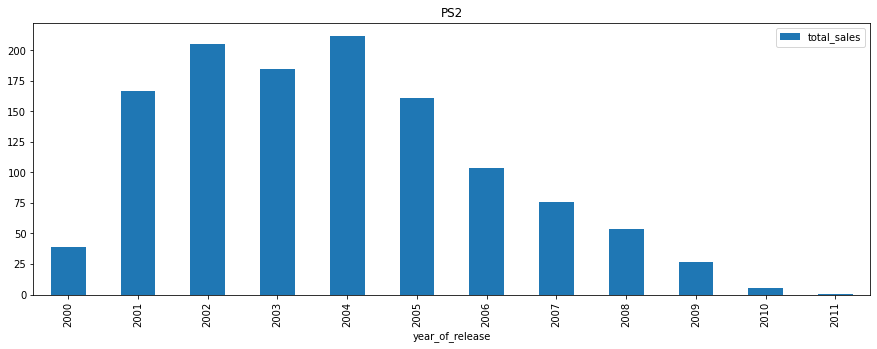

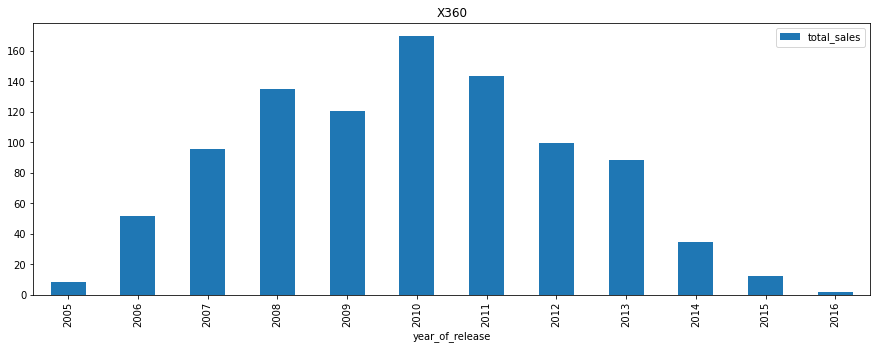

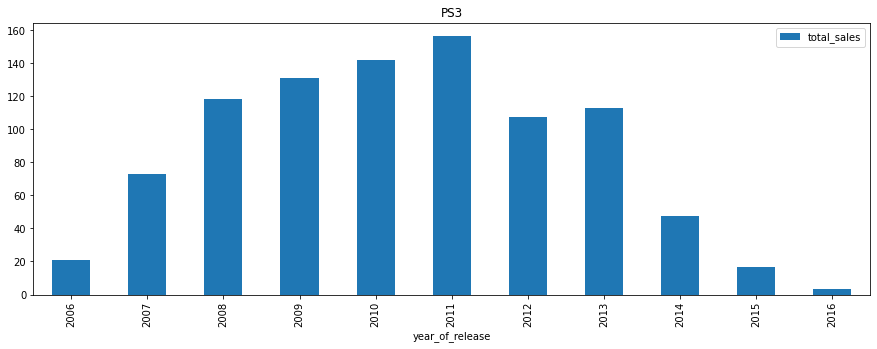

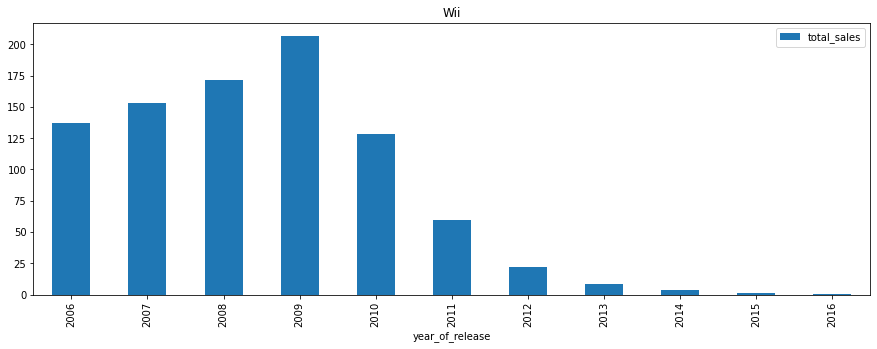

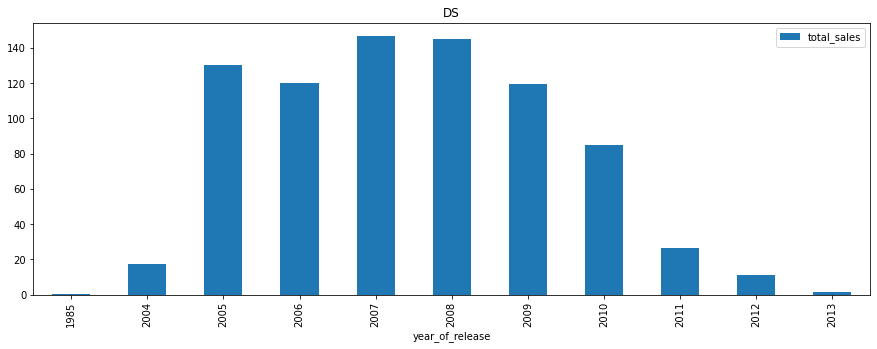

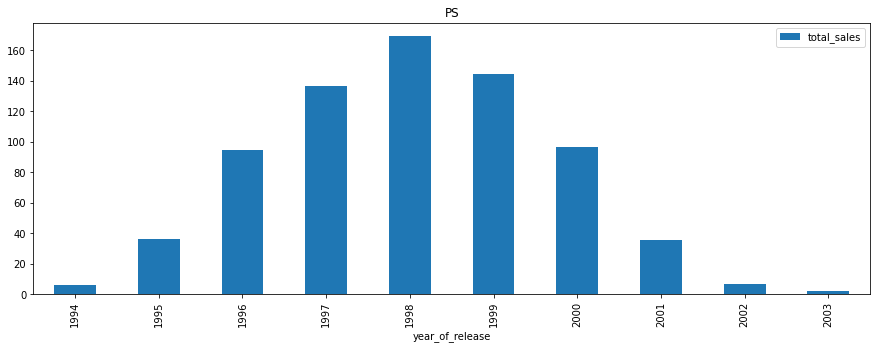

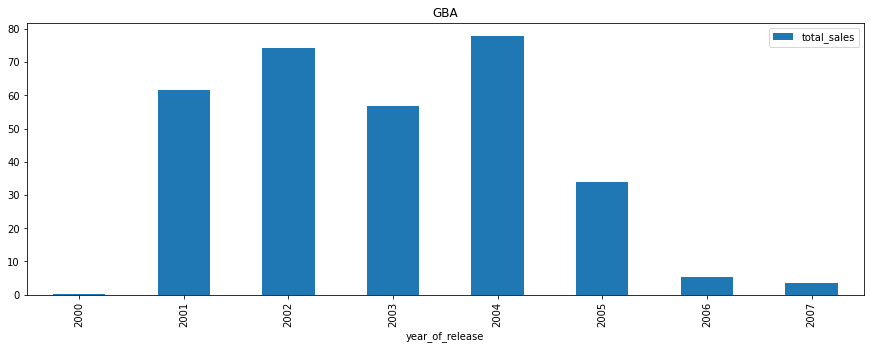

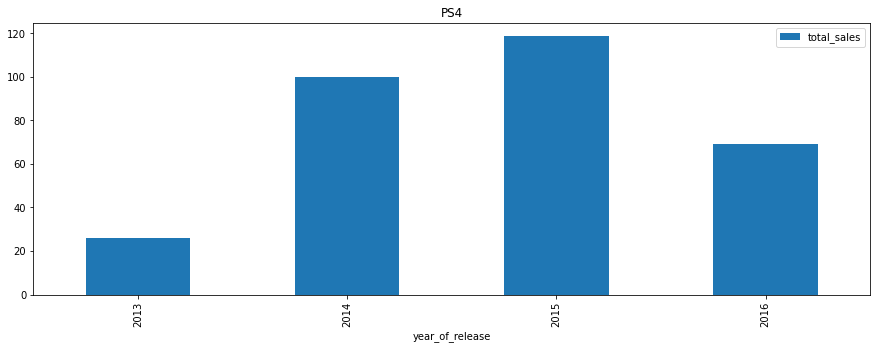

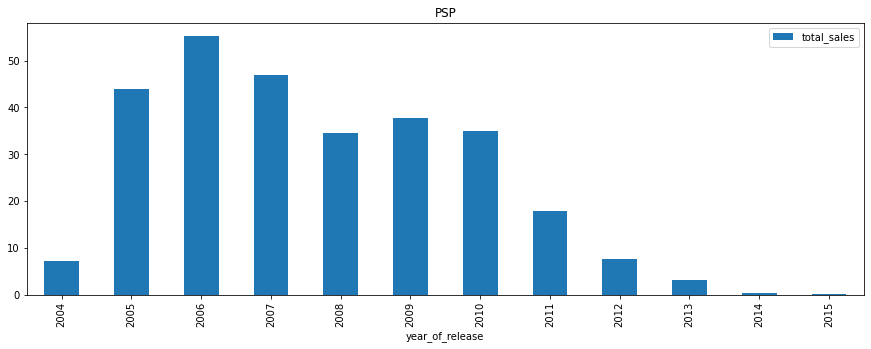

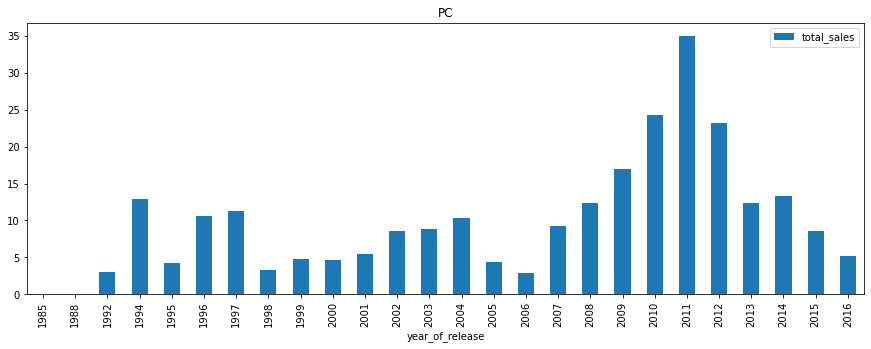

In [22]:
for pla in top10.index:
    df[(df['platform'] == pla) & (df['year_of_release'] != 0)]\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(15,5)).set_title(pla)

Популярные платформы в среднем пользовались спросом не более 10 лет. Такие большие компании, как Sony, выпускали новую версию платформы PS каждые 5-6 лет, что позволило компании оставаться в топах на протяжении 14 лет.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Для того, чтобы сделать прогноз на 2017 год, лучше взять выборку, близкую к этому году, чтобы избежать искажений. Например, с 2013 по 2016.

In [23]:
valid_period = df.query('year_of_release >= 2013')

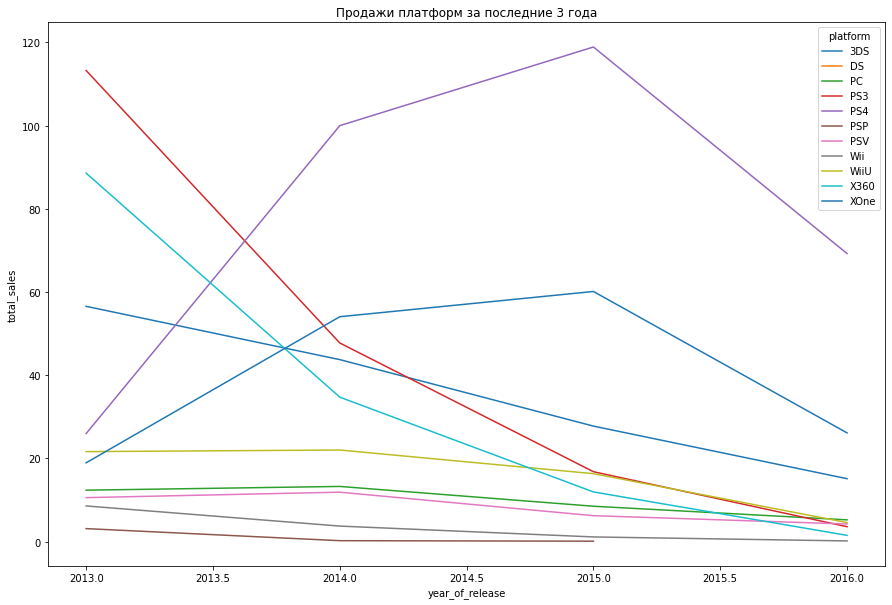

In [24]:
pla_data = valid_period.pivot_table(index='year_of_release', columns='platform',
                                    values='total_sales', aggfunc='sum').plot(figsize=(15,10))
pla_data.set_title('Продажи платформ за последние 3 года')
pla_data.set_ylabel('total_sales');

К 2017 году все платформы идут на снижение по продажам. Игры на PS4 продаются чаще всех, что, вероятно, приведет к тому, что в 2017 году платформа PS4 станет одной из самых прибыльных.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

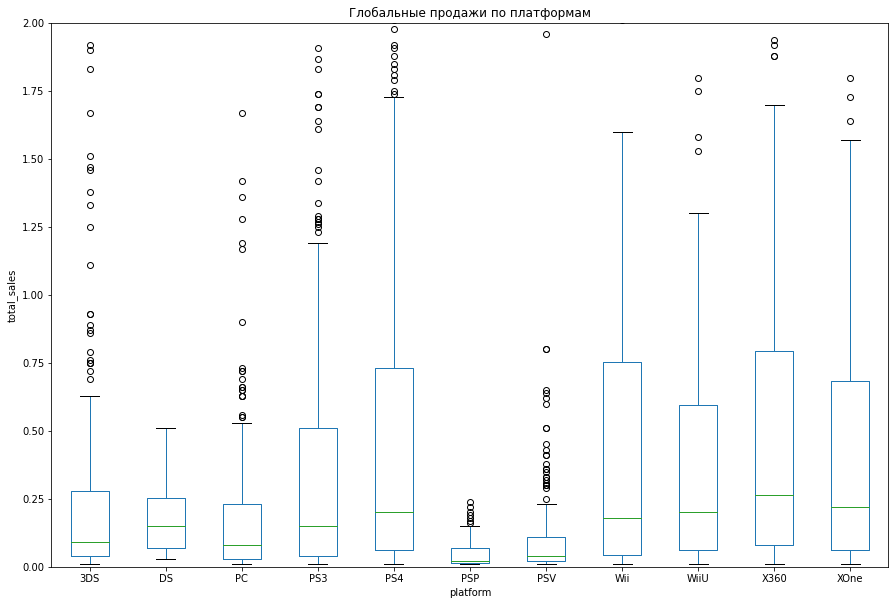

In [25]:
data_plot = valid_period.pivot_table(index='name', values='total_sales', columns='platform', aggfunc='sum')
ax = data_plot.plot(kind='box', ylim=(0, 2), figsize=(15,10), xlabel='platform')
ax.set_title('Глобальные продажи по платформам')
ax.set_xlabel('platform')
ax.set_ylabel('total_sales');

Объединяя данные графика и диаграммы "ящик с усами", можно заключить, что PS4, XOne, 3DS являются потенциально прибыльными в следующем году. Платформы Wii, WiiU, X360, PS3 с высокими медианными значениями показывают резкое снижение продаж на графике. Это может быть обусловлено выходом платформ новых поколений от тех же компаний. PC показывает хоть и низкие, но стабильные прадажы, поэтому, вероятно, персональные компьютеры всё ещё останутся на рынке. PSP ушёл с рынка в 2015 году, поэтому в 2017 мы вряд ли его увидим. Wii, PS3, X360 потенциально уйдут с рынка. 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [26]:
valid_period.query('platform in @top10.index').groupby('platform').count()['critic_score'].sort_values(ascending=False)[:5]

platform
PS4     252
PC      149
PS3     121
X360     81
PSP       1
Name: critic_score, dtype: int64

In [27]:
valid_period.query('platform in @top10.index').groupby('platform').count()['user_score'].sort_values(ascending=False)[:5]

platform
PS4     257
PS3     186
PC      155
X360    143
Wii       7
Name: user_score, dtype: int64

In [28]:
valid_period.query('platform in @top10.index').groupby('platform').count()['total_sales'].sort_values(ascending=False)[:5]

platform
PS4     392
PS3     345
PC      189
X360    186
PSP      67
Name: total_sales, dtype: int64

Среди популярных платформ больше всего данных представлено по PS4. Её и возьмем для вычисления корреляции между отзывами и продажами:

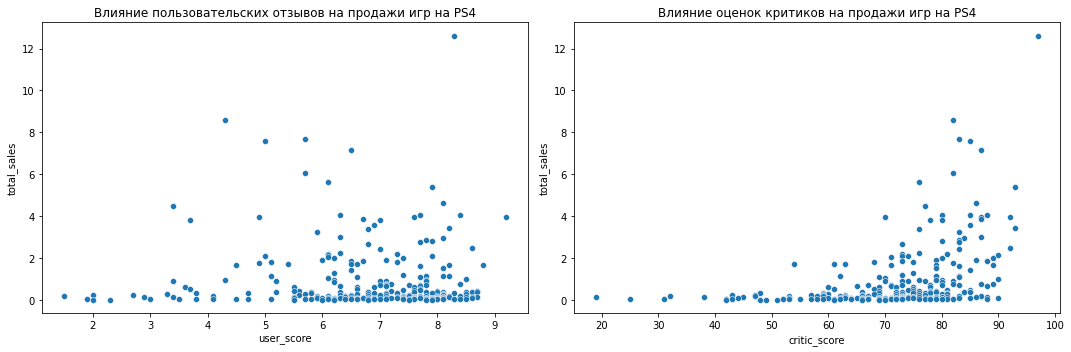

In [29]:
PS4 = valid_period.query('platform == "PS4"')
f, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=PS4, x="user_score", y="total_sales", ax=axs[0])\
                .set_title('Влияние пользовательских отзывов на продажи игр на PS4')
plt.xlabel('user_score')
plt.ylabel('total_sales')

sns.scatterplot(data=PS4, x="critic_score", y="total_sales", ax=axs[1])\
                .set_title('Влияние оценок критиков на продажи игр на PS4')
plt.xlabel('critic_score')
f.tight_layout()

In [30]:
PS4[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Заметим, что коэффициент корреляции между оценками критиков и продажами близко к 0.5, в то время как корреляция между отзывами игроков и продажами отрицательно, что говорит об обратной пропорциональности. Следовательно, оценка критиков оказывает значительно большее влияние на увеличение продаж, чем отзывы самих игроков.

### Соотнесите выводы с продажами игр на других платформах.

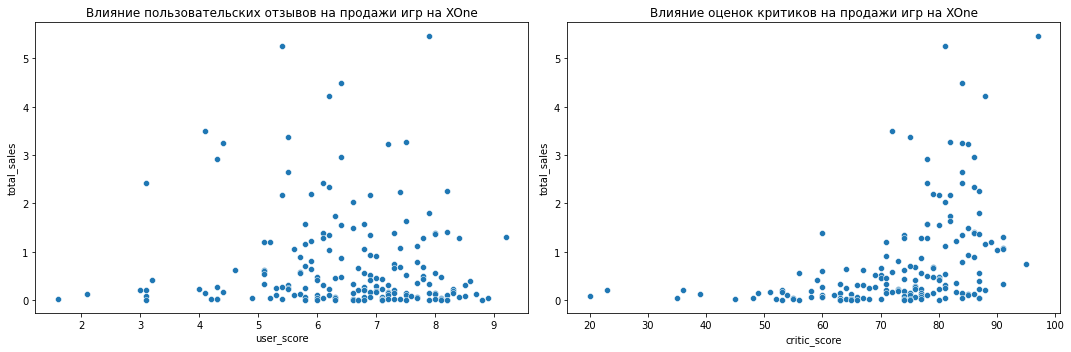

In [31]:
XOne = valid_period.query('platform == "XOne"')
f, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=XOne, x="user_score", y="total_sales", ax=axs[0])\
                .set_title('Влияние пользовательских отзывов на продажи игр на XOne')
plt.xlabel('user_score')
plt.ylabel('total_sales')
sns.scatterplot(data=XOne, x="critic_score", y="total_sales", ax=axs[1])\
                .set_title('Влияние оценок критиков на продажи игр на XOne')
plt.xlabel('critic_score')
f.tight_layout()

In [32]:
valid_period.query('platform == "XOne"')[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


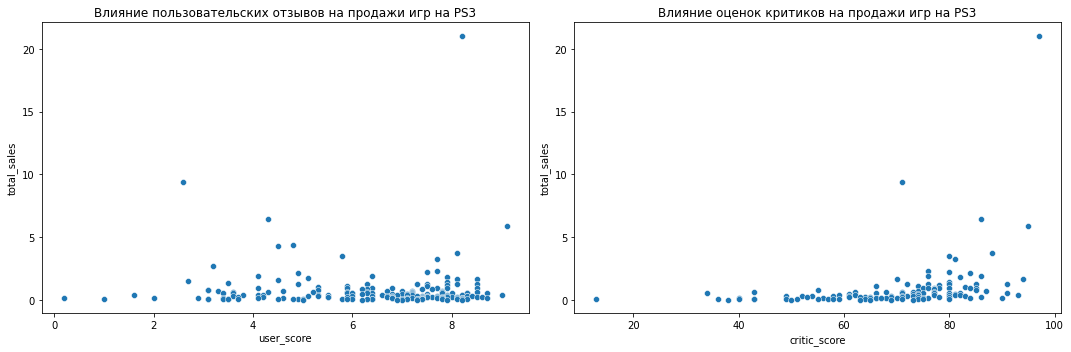

In [33]:
PS3 = valid_period.query('platform == "PS3"')
f, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=PS3, x="user_score", y="total_sales", ax=axs[0])\
                .set_title('Влияние пользовательских отзывов на продажи игр на PS3')
plt.xlabel('user_score')
plt.ylabel('total_sales')
sns.scatterplot(data=PS3, x="critic_score", y="total_sales", ax=axs[1])\
                .set_title('Влияние оценок критиков на продажи игр на PS3')
plt.xlabel('critic_score')
f.tight_layout()

In [34]:
valid_period.query('platform == "PS3"')[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
total_sales,0.334285,0.002394,1.000000


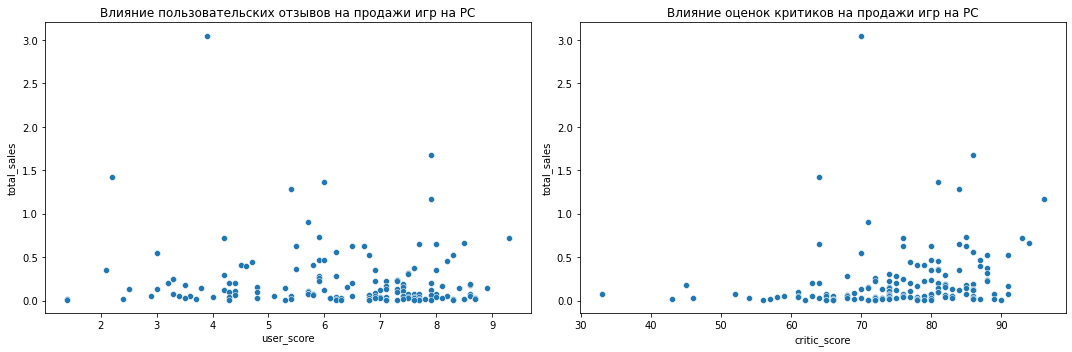

In [35]:
PC = valid_period.query('platform == "PC"')
f, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=PC, x="user_score", y="total_sales", ax=axs[0])\
                .set_title('Влияние пользовательских отзывов на продажи игр на PC')
plt.xlabel('user_score')
plt.ylabel('total_sales')
sns.scatterplot(data=PC, x="critic_score", y="total_sales", ax=axs[1])\
                .set_title('Влияние оценок критиков на продажи игр на PC')
plt.xlabel('critic_score')
f.tight_layout()

In [36]:
valid_period.query('platform == "PC"')[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.429562,0.196030
user_score,0.429562,1.000000,-0.093842
total_sales,0.196030,-0.093842,1.000000


Платформы XOne, PS3, PC подтверждают предыдущее предположение. Коэффициенты корреляции между оценками критиков и продажами высоки, тогда как коэффициенты корреляции между оценками игроков и продажами принимают отрицательные значения, то есть имеют обратную зависимость. По полученным данным можно однозначно сказать, что оценки критиков влияют на количество продаж, а отзывы игроков покупатели не принимают во внимание.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

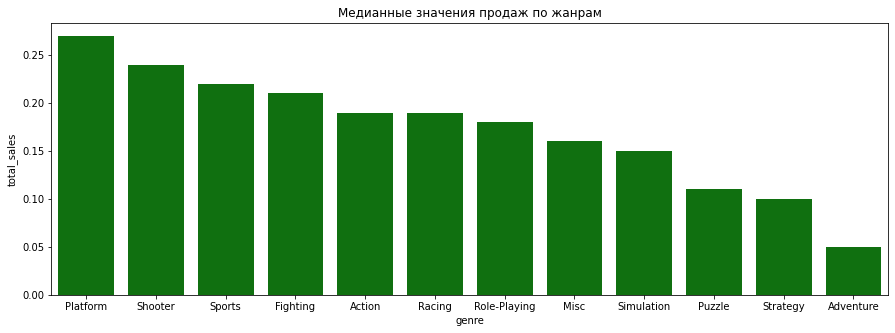

In [37]:
genre_data = df.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)
ax = sns.barplot(x=genre_data.index, y=genre_data['total_sales'], color='green')
ax.figure.set_size_inches(15,5)
ax.set_title('Медианные значения продаж по жанрам');

Сравним медианные значения продаж по каждому жанру. Наиболее прибыльным жанром является платформеры, они стабильно показывают высокие продажи. Шутеры и спортивные занимают 2 и 3 места соответственно. Пазлы, Стратегии и Приключенческие игры привлекают меньше всего покупателей, видимо, из-за монотонности игр.

### Вывод:
- В данной выборке представлены игры, выпущенные в годы с 1980 по 2016, однако актуальной выборкой лучше считать период с 2013 по 2016;
- Популярные платформы: PS2, X360, PS3;
- Популярные платформы в среднем пользовались спросом не более 10 лет;
- Потенциально прибыльные платформы: 3DS, PC, XOne;
- Потенциально уйдут с рынка: Wii, X360, PS3;
- Оценки критиков влияют на количество продаж, а отзывы игроков покупатели не принимают во внимание;
- Platform, Shooter, Sports являются самыми популярными жанрами;
- Puzzle, Strategy, Adventure не пользуются спросом.

<a id='section4'></a>
## Портрет пользователя каждого региона

### Северная Америка

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20


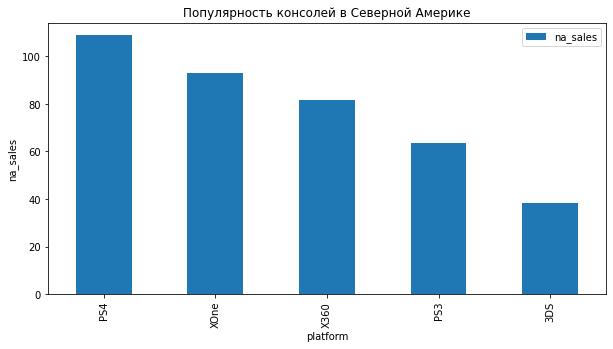

In [38]:
na_games_sales = valid_period.query('na_sales > 0')

print(na_games_sales.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
      .sort_values(by='na_sales', ascending=False)[:5])

na_games_sales.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)[:5]\
.plot(kind='bar', figsize=(10, 5)).set_title('Популярность консолей в Северной Америке')
plt.ylabel('na_sales');

Отличия в долях: Наиболее распространенной платформой является PS4, показатели которой мало отличаются от остальных платформ. Вторая по популярности платформа XOne отстает на шестую чать от популярности первой. Разница между всеми платформами PS4, XOne, X360, PS3, 3DS составляет примерно 16 единиц и мало отличается. Наименее популярной из пяти представленных платформ является 3DS, рейтинг которой составляет третью часть от рейтинга PS4.

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49


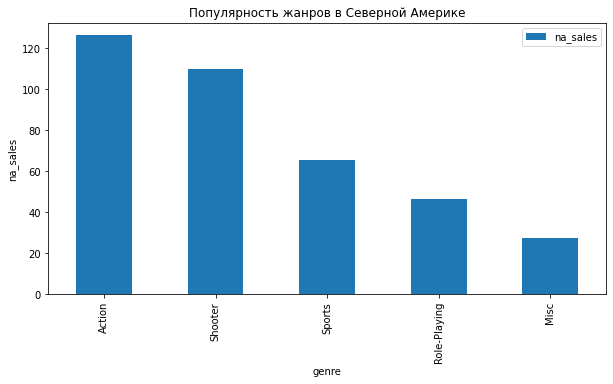

In [39]:
print(na_games_sales.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
      .sort_values(by='na_sales', ascending=False)[:5])
na_games_sales.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
      .sort_values(by='na_sales', ascending=False).head(5)\
      .plot(kind='bar', figsize=(10, 5)).set_title('Популярность жанров в Северной Америке')
plt.ylabel('na_sales');

Отличия в долях: Наиболее распространенным жанром является Action, показатели которого сильно отличаются от последних 3х жанров из 5. Второй по популярности жанр Shooter отстает на шестую часть, а третий Sports составляет половину от популярности первого. Разница между остальными 3я жанрами Sports, Role-Playing, Misc составляет примерно 16 единиц и мало отличается. Наименее популярным из пяти представленных жанров является Misc, рейтинг которого составляет пятую часть от рейтинга Action.
<br> <br>
Северная Америка: среднестатистический пользователь играет на платформах PS4, XOne, X360, PS3, 3DS. В основном выбирает жанры Action, Shooter, Sports, Role-Playing, Misc.

### Европа

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96


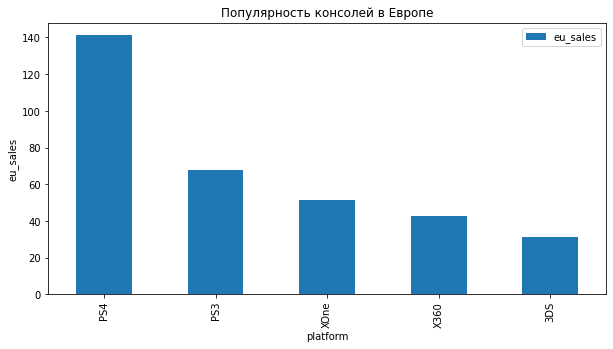

In [40]:
eu_games_sales = valid_period.query('eu_sales > 0')

print(eu_games_sales.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
      .sort_values(by='eu_sales', ascending=False)[:5])

eu_games_sales.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)[:5]\
.plot(kind='bar', figsize=(10, 5)).set_title('Популярность консолей в Европе')
plt.ylabel('eu_sales');

Отличие в долях: Наиболее распространенной платформой является PS4, показатели которой сильно отличаются от остальных платформ. Вторая по популярности платформа PS3 составляет половину от популярности первой. Разница между стальными 4 платформами PS3, XOne, X360, 3DS составляет примерно 16 единиц и мало отличается. Наименее популярной из пяти представленных платформ является 3DS, рейтинг которой составляет пятую часть от рейтинга PS4.

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19


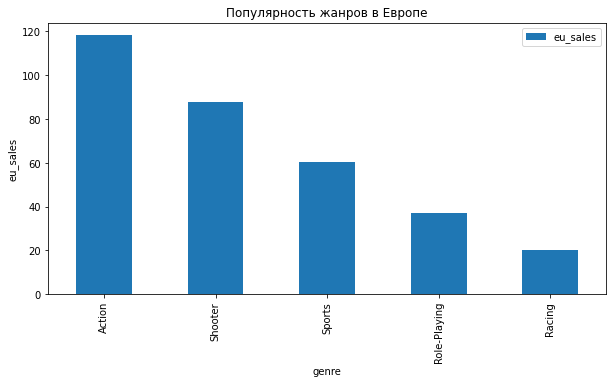

In [41]:
print(eu_games_sales.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
      .sort_values(by='eu_sales', ascending=False)[:5])
eu_games_sales.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
      .sort_values(by='eu_sales', ascending=False).head(5)\
      .plot(kind='bar', figsize=(10, 5)).set_title('Популярность жанров в Европе')
plt.ylabel('eu_sales');

Отличия в долях: Наиболее распространенным жанром является Action, показатели которого мало отличаются от остальных жанров. Второй по популярности жанр Shooter отстает на четвертую часть, а третий Sports составляет половину от популярности первого. Разница между всеми жанрами Action, Shooter, Sports, Role-Playing, Racing составляет примерно 35 единиц и мало отличается. Наименее популярным из пяти представленных жанров является Racing, рейтинг которого составляет шестую часть от рейтинга Action.

Европа: среднестатистический пользователь играет на платформах PS4, PS3, XOne, X360, 3DS. В основном выбирает жанры Action, Shooter, Sports, Role-Playing, Racing.

### Япония

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


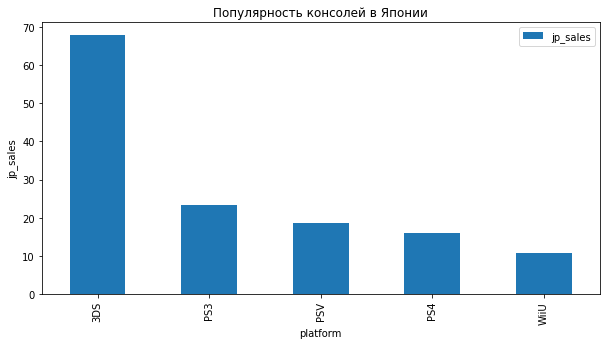

In [42]:
jp_games_sales = valid_period.query('jp_sales > 0')

print(jp_games_sales.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
      .sort_values(by='jp_sales', ascending=False)[:5])

jp_games_sales.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)[:5]\
.plot(kind='bar', figsize=(10, 5)).set_title('Популярность консолей в Японии')
plt.ylabel('jp_sales');

Отличие в долях: Наиболее распространенной платформой является 3DS, показатели которой сильно отличаются от остальных платформ. Вторая по популярности платформа PS3 составляет треть от популярности первой. Разница между стальными 4 платформами PS3, PSV, PS4, WiiU составляет примерно 5 единиц и мало отличается. Наименее популярной из пяти представленных платформ является WiiU, рейтинг которой составляет седьмую часть от рейтинга 3DS.

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


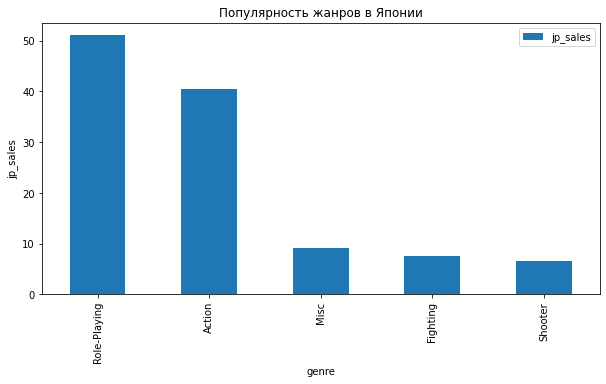

In [43]:
print(jp_games_sales.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
      .sort_values(by='jp_sales', ascending=False)[:5])
jp_games_sales.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
      .sort_values(by='jp_sales', ascending=False).head(5)\
      .plot(kind='bar', figsize=(10, 5)).set_title('Популярность жанров в Японии')
plt.ylabel('jp_sales');

Отличия в долях: Наиболее распространенным жанром является Role-Playing, показатели которого мало отличаются от второго по популярности жанра. Второй по популярности жанр Axtion отстает на пятую часть, а третий Misc составляет лишь шестую часть от популярности первого. Разница между оставшимися 3я жанрами Misc, Fighting, Shooter составляет примерно 2 единицы и практически не отличается. Наименее популярным из пяти представленных жанров является Shooter, рейтинг которого составляет восьмую часть от рейтинга Role-Playing.

Япония: среднестатистический пользователь играет на платформах 3DS, PS3, PSV, PS4, WiiU. В основном выбирает жанры Role-Playing, Action, Misc, Fighting, Shooter.

In [44]:
ESRB = valid_period.pivot_table(index='rating', values=['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79


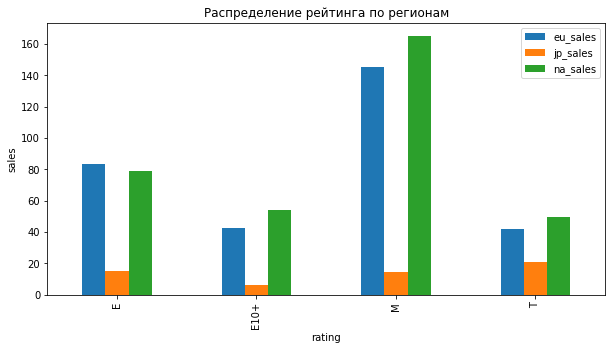

In [45]:
ESRB.plot(kind='bar', title='Распределение рейтинга по регионам', ylabel='sales', figsize=(10,5));

Рейтинг возраста влияет по каждому региону. <br>
В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 6+ и 17+. Это означает, что эти рынки ориентированы на взрослых пользователей. <br>
В Японии лидириуют игры с возрастным рейтингом 6+ и 13+. Вероятно, компании хотят распространить свое влияние на новое поколение.

### Вывод:
- Рейтинг платформ:
    - Топ 5 по Северной Америке: PS4, XOne, X360, PS3, 3DS
    - Топ 5 по Европе: PS4, PS3, XOne, X360, 3DS
    - Топ 5 по Японии: 3DS, PS3, PSV, PS4, WiiU
- Популярность XOne в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo и Sony c двумя продуктами 3DS и PS3. На европейском рыноке преобладают американские и японские модели, так как в данном регионе нет крупных компаний по разработке платформ;
- Итоги регионального анализа по жанрам:
    - Рейтинг жанров:
        - Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing, Misc
        - Топ 5 по Европе: Action, Shooter, Sports, Role-Playing, Racing
        - Топ 5 по Японии: Role-Playing, Action, Misc, Fighting, Shooter
    - Американские и европейские игроки имеют схожите тенденции по жанрам в целом, видимо, из-за схожести культур и традиций. Все топ-5 жанры показывают примерно одинаковые рейтинги. 
    - Японские геймеры отдают предпочтение играм с более спокойным сценарием, значительно преобладает жанры Role-Playing и Action. Видимо, Япония - достаточно специфический рынок, к которому нужен особый подход в плане рекламных кампаний.
    - Вне зависимости от региона всегда будут популярны игры экшен, так как многие поколения выросли на этом жанре.
- Рейтинг возраста влияет по каждому региону.

<a id='section5'></a>
## Проверка гипотез

### Первая гипотеза
H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br>
H_1: Средние пользовательские рейтинги платформ Xbox One и PC разные. <br>

Для проверки гипотезы применим ttest_ind, так как мы проверяем среднее двух независимых выборок.

In [46]:
XOne = valid_period[(valid_period['platform'] == 'XOne') & (valid_period['user_score'] > 0)]['user_score']
PC = valid_period[(valid_period['platform'] == 'PC') & (valid_period['user_score'] > 0)]['user_score']

In [47]:
print('Средний пользовательский рейтинг платформы Xbox: ', XOne.mean())
print('Средний пользовательский рейтинг платформы PC: ', PC.mean())

Средний пользовательский рейтинг платформы Xbox:  6.521428571428572
Средний пользовательский рейтинг платформы PC:  6.2696774193548395


In [48]:
alpha = 0.01

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Гипотеза подтверждена, значит, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Вторая гипотеза

H_0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. <br>
H_1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. <br>

Для проверки применим ttest_ind, так как мы проверяем среднее двух независимых выборок.

In [49]:
Action = valid_period[(valid_period['genre'] == 'Action') & (valid_period['user_score'] > 0)]['user_score']
Sports = valid_period[(valid_period['genre'] == 'Sports') & (valid_period['user_score'] > 0)]['user_score']

In [50]:
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


In [51]:
alpha = 0.01

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Гипотеза отвергнута. Значит, cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

<a id='section6'></a>
## Итоги

В ходе проделанной работы было выполнено:
- Просмотрены данные, выявлены аномалии и пропущенные значения;
- Проведена предобработка данных: замена столбцов, заполнение пропусков, удаление дубликатов;
- Проведен анализ по данным и выделен актуальный временной промежуток;
- Составлены портреты пользователей для трёх купных регионов продаж;
- Выполнены проверки гипотез.

Основные выводы:
- Продажи компьютерных игр зависят от трех составляющих: компания-создатель, платформа и жанр;
- На данный момент популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов;
- Платформа определяет технические возможности разработчиков. Жизненный цикл в 5-12 лет обусловлен улучшениями в технологиях процессора, оперативной и видеопамяти;
- В данной выборке представлены игры, выпущенные в годы с 1980 по 2016, однако актуальной выборкой лучше считать период с 2013 по 2016;
- Популярные платформы в среднем пользовались спросом не более 10 лет;
- Оценки критиков влияют на количество продаж, а отзывы игроков покупатели не принимают во внимание;
- Platform, Shooter, Sports являются самыми популярными жанрами;
- Puzzle, Strategy, Adventure не пользуются спросом;
- Cредние пользовательские рейтинги платформ Xbox, XOne и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Критерии определяющие успешность игры:
- Платформа, которая наиболее распространена в данном регионе;
- Жанр;
- Рейтинг критиков;
- Возрастной рейтинг компьютерных игр.

Рекомендации:
- Игры, которые будут продаваться в Северной Америке лучше всего:
    - ESRB: M, Е, T
    - Платформа: PS4, XOne, X360, PS3, 3DS
    - Жанр: Action, Shooter, Sports, Role-Playing, Misc

- Игры, которые будут продаваться в Европе лучше всего:
    - ESRB: M, Е, T
    - Платформа: PS4, PS3, XOne, X360, 3DS
    - Жанр: Action, Shooter, Sports, Role-Playing, Racing

- Игры, которые будут продаваться в Японии лучше всего:
    - ESRB: T, Е, M
    - Платформа: 3DS, PS3, PSV, PS4, WiiU
    - Жанр: Role-Playing, Action, Misc, Fighting, Shooter
    
- Важно помнить:
    - Потенциально прибыльные платформы: PS4, XOne, 3DS;
    - Потенциально уйдут с рынка: Wii, PS3, X360.